In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("C:\\Users\\hardi\\OneDrive\\Desktop\\coding\\SGP\\Smart Agri-system\\data\\fertilizer_recommendation.csv")
print(df.head())

print("\nShape:", df.shape)
df.info()

   Temperature  Humidity  Moisture Soil Type  Crop Type   N  K   P Fertilizer
0         26.0      52.0      38.0     Sandy      Maize  37  0   0       Urea
1         29.0      52.0      45.0     Loamy  Sugarcane  12  0  36        DAP
2         34.0      65.0      62.0     Black     Cotton   7  9  30   14-35-14
3         32.0      62.0      34.0       Red    Tobacco  22  0  20      28-28
4         28.0      54.0      46.0    Clayey       Rice  35  0   0       Urea

Shape: (8000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8000 non-null   float64
 1   Humidity     8000 non-null   float64
 2   Moisture     8000 non-null   float64
 3   Soil Type    8000 non-null   object 
 4   Crop Type    8000 non-null   object 
 5   N            8000 non-null   int64  
 6   K            8000 non-null   int64  
 7   P            8000 non-nul

In [3]:
# Replace 0 values with NaN in specific columns
zero_cols = ["Temperature", "Humidity", "Moisture", "N", "P", "K"]
df[zero_cols] = df[zero_cols].replace(0, np.nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8000 non-null   float64
 1   Humidity     8000 non-null   float64
 2   Moisture     8000 non-null   float64
 3   Soil Type    8000 non-null   object 
 4   Crop Type    8000 non-null   object 
 5   N            7979 non-null   float64
 6   K            4540 non-null   float64
 7   P            6914 non-null   float64
 8   Fertilizer   8000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 562.6+ KB


In [4]:
# Handle missing values by imputing with median
print("\nMissing Values:\n", df.isnull().sum())
for col in zero_cols:
    df.fillna(df[col].median(), inplace=True)

df.head()


Missing Values:
 Temperature       0
Humidity          0
Moisture          0
Soil Type         0
Crop Type         0
N                21
K              3460
P              1086
Fertilizer        0
dtype: int64


,Temperature,Humidity,Moisture,Soil Type,Crop Type,N,K,P,Fertilizer
0,26.0,52.0,38.0,Sandy,Maize,37.0,30.24,30.24,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12.0,30.24,36.00,DAP
2,34.0,65.0,62.0,Black,Cotton,7.0,9.00,30.00,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22.0,30.24,20.00,28-28
4,28.0,54.0,46.0,Clayey,Rice,35.0,30.24,30.24,Urea


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8000 non-null   float64
 1   Humidity     8000 non-null   float64
 2   Moisture     8000 non-null   float64
 3   Soil Type    8000 non-null   object 
 4   Crop Type    8000 non-null   object 
 5   N            8000 non-null   float64
 6   K            8000 non-null   float64
 7   P            8000 non-null   float64
 8   Fertilizer   8000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 562.6+ KB


In [6]:
## data cleaning and preprocessing
print("\nDuplicate Entries:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

print("cleaned dataset shape:", df.shape)


Duplicate Entries: 0
cleaned dataset shape: (8000, 9)


In [7]:
X = df.drop("Fertilizer", axis=1)
y = df["Fertilizer"]

In [8]:
# Encode categorical variables
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fert = LabelEncoder()

X["Soil Type"] = le_soil.fit_transform(X["Soil Type"])
X["Crop Type"] = le_crop.fit_transform(X["Crop Type"])
y = le_fert.fit_transform(y)


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


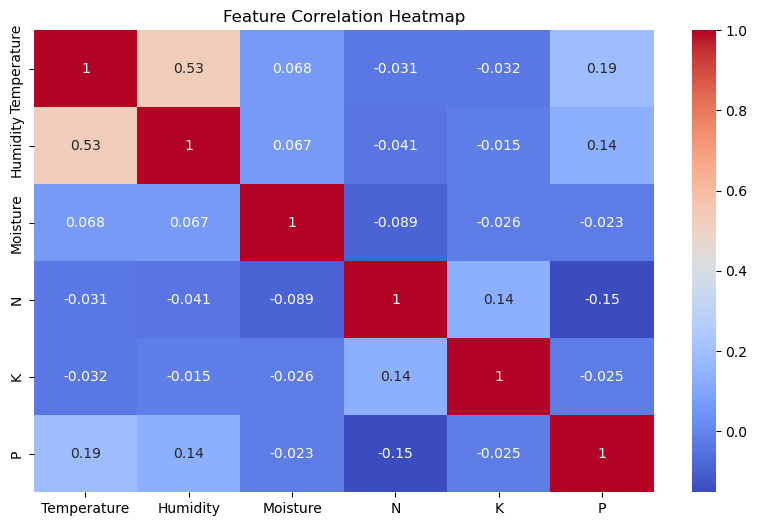

In [10]:
## Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train:", X_train.shape)
print("Test :", X_test.shape)


# Scale features (fit only on training set)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train: (6400, 8)
Test : (1600, 8)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
dt_model = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

dt_model.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
y_pred_dt = dt_model.predict(X_test)


In [15]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.14625

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.19      0.19       241
           1       0.14      0.14      0.14       241
           2       0.14      0.17      0.15       215
           3       0.13      0.11      0.12       236
           4       0.14      0.13      0.13       219
           5       0.16      0.16      0.16       239
           6       0.12      0.13      0.12       209

    accuracy                           0.15      1600
   macro avg       0.15      0.15      0.15      1600
weighted avg       0.15      0.15      0.15      1600


Confusion Matrix:
 [[46 30 29 30 34 38 34]
 [25 33 49 28 30 37 39]
 [27 33 36 26 32 28 33]
 [35 33 51 26 35 33 23]
 [36 35 27 31 28 29 33]
 [40 42 35 26 20 38 38]
 [33 33 25 30 28 33 27]]


In [16]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    criterion="entropy",
    random_state=42
)

rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
y_pred_rf = rf_model.predict(X_test)


In [18]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.13875

Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.12      0.13       241
           1       0.10      0.09      0.09       241
           2       0.12      0.13      0.12       215
           3       0.16      0.14      0.15       236
           4       0.14      0.13      0.14       219
           5       0.17      0.16      0.17       239
           6       0.16      0.21      0.18       209

    accuracy                           0.14      1600
   macro avg       0.14      0.14      0.14      1600
weighted avg       0.14      0.14      0.14      1600


Confusion Matrix:
 [[29 37 35 34 34 33 39]
 [36 22 48 31 27 30 47]
 [31 32 28 26 26 38 34]
 [34 28 42 32 36 27 37]
 [34 31 34 25 29 33 33]
 [34 41 35 31 24 39 35]
 [24 40 16 26 31 29 43]]
